<a href="https://colab.research.google.com/github/zahran1234/machine-learning-/blob/main/audio_separation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install Ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np


In [ ]:
s1_file = "/content/music.wav"
s2_file = "/content/talk.wav"


In [ ]:
import numpy as np
np.random.seed(0)

from scipy.io import wavfile as wf

def mix_sources(sources, apply_noise=False):
    for i in range(len(sources)):
        max_val = np.max(sources[i])
        if(max_val > 1 or np.min(sources[i]) < 1):
            sources[i] = sources[i] / (max_val / 2) - 0.5
            
    mixture = np.c_[[source for source in sources]]
    
    if(apply_noise):
        mixture += 0.02 * np.random.normal(size=X.shape)
        
    return mixture

_, s1 = wf.read(s1_file)

sampling_rate, s2 = wf.read(s2_file)
print(s1.shape, s2.shape)

(1323000,) (220568,)


In [ ]:
if s1.shape[0]> s2.shape[0]:
  s1=s1[:s2.shape[0]]
else:
  s2=s2[:s1.shape[0]]

x = mix_sources([s1, s2], False)

print(f'Shape of s1: {s1.shape}, s2: {s1.shape}, Linear Mix: {x.shape}')

wf.write('./talk_and_music2.wav', _, x.mean(axis=0).astype(np.float32))

Shape of s1: (220568,), s2: (220568,), Linear Mix: (2, 220568)


In [ ]:
def center(x):
    x = np.array(x)
    return x - x.mean(axis=1, keepdims=True)






In [ ]:
def whiten(x):
    eigen_values, eigen_vectors = np.linalg.eigh(np.cov(x))
    D = np.diag(eigen_values)
    sqrt_inverse_D = np.sqrt(np.linalg.inv(D))
    x_whiten = eigen_vectors @ (sqrt_inverse_D @ (eigen_vectors.T @ x))
    
    print(f'Shape of Eigen Values: {eigen_values.shape}, Eigen Vectors: {eigen_vectors.shape}, Whitened Data: {x_whiten.shape}')
    
    return x_whiten, D, eigen_vectors

In [ ]:
X_whiten, D, E = whiten(center(x))
D, E

Shape of Eigen Values: (2,), Eigen Vectors: (2, 2), Whitened Data: (2, 220568)


(array([[0.04109109, 0.        ],
        [0.        , 0.05854404]]), array([[-0.01286218, -0.99991728],
        [-0.99991728,  0.01286218]]))

In [ ]:
def objFunc(x):
    return np.tanh(x)

def dObjFunc(x):
    return 1 - (objFunc(x) ** 2)

def calc_w_hat(W, X):
    # Implementation of the eqn. Towards Convergence
    w_hat = (X * objFunc(W.T @ X)).mean(axis=1) - dObjFunc(W.T @ X).mean() * W
    w_hat /= np.sqrt((w_hat ** 2).sum())
    
    return w_hat

In [ ]:
def ica(X, iterations, tolerance=1e-5):
    num_components = X.shape[0]
    
    W = np.zeros((num_components, num_components), dtype=X.dtype)
    distances = {i: [] for i in range(num_components)}
    
    for i in np.arange(num_components):
        w = np.random.rand(num_components)
        for j in np.arange(iterations):
            w_new = calc_w_hat(w, X)
            if(i >= 1):
                w_new -= np.dot(np.dot(w_new, W[:i].T), W[:i])
            distance = np.abs(np.abs((w * w_new).sum()) - 1)
            
            w = w_new
            if(distance < tolerance):
                print(f'Convergence attained for the {i+1}/{num_components} component.')
                print(f'Component: {i+1}/{num_components}, Step: {j}/{iterations}, Distance: {distance}\n')
            
                break;
                
            distances[i].append(distance)
            
            if(j % 50 == 0):
                print(f'Component: {i+1}/{num_components}, Step: {j}/{iterations}, Distance: {distance}')
            
            
                
        W[i, :] = w
    S = np.dot(W, X)
    
    return S, distances

S, distances = ica(X_whiten, iterations=100)
wf.write('s1_predicted.wav', sampling_rate, S[0].astype(np.float32))
wf.write('s2_predicted.wav', sampling_rate, S[1].astype(np.float32))

Component: 1/2, Step: 0/100, Distance: 0.10936489265098637
Convergence attained for the 1/2 component.
Component: 1/2, Step: 4/100, Distance: 2.2669005184106084e-07

Component: 2/2, Step: 0/100, Distance: 0.5502664090183635
Component: 2/2, Step: 50/100, Distance: 4.7442816651921405e-05


In [ ]:
distances[0]

[0.10936489265098637,
 0.025031127944613152,
 0.022779972340709387,
 0.0019331204953136893]

# **`after separation sound1 `**

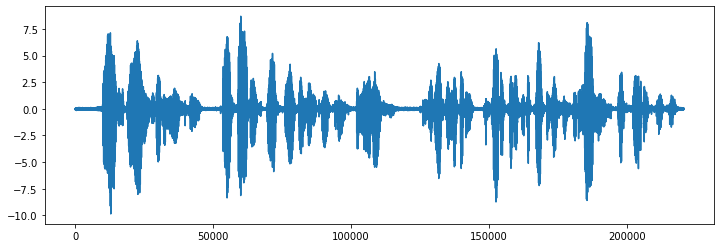

In [ ]:
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(S[0])

# **befour sound 1**

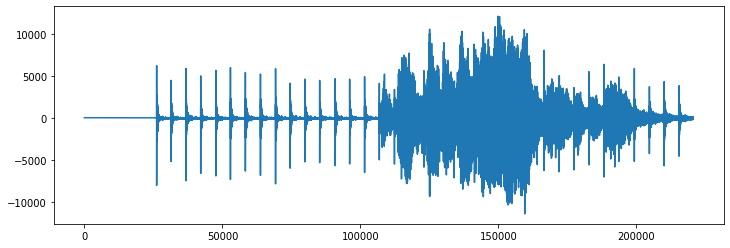

In [ ]:
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(s1)

In [ ]:
import IPython.display as ipd

# **mixed sound**

In [ ]:
ipd.Audio("/content/talk_and_music2.wav")

# **separeted sound number one**

In [ ]:
ipd.Audio("/content/s1_predicted.wav")

# **separeted sound number two**

In [ ]:
ipd.Audio("/content/s2_predicted.wav")